<a href="https://colab.research.google.com/github/hucarlos08/GEO-ML/blob/main/Lessons/Expectation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Given a random variable $X$, we define $E[x]$ as:
$$
\begin{align}
      E[X]&=\sum_{i=1}^n x_ip(X=x_i)\ \\
      E[X]&=\int_{-\infty}^{\infty}xf(x)dx \\
\end{align}
$$
where $p(x)$ is a PMF and $f(x)$ is PDF.

2. Given two random variables: $X$, $Y$ and a constants $a$ and $b$:
\begin{align}
E[aX+bY]&=aE[X] + bE[Y]\\
\end{align}

3. Given a constant $c$
$$
E[c]=c
$$

## Rolling a dice

In [ ]:
E_x = sum([i*1./6 for i in range(1,7)])
print(f'Expectation of X is: {E_x}')

# Expectation of odd numbers
E_odd = sum([i*1./6 for i in range(1,7) if i%2==1])
print(f'Expectation of X(odd) is: {E_odd}')

# Suppose we roll a die with N faces, we can calculate te E[X] as:
N = 1000
E_N = sum([float(i)/N for i in range(1,N+1)])
print(f'Expectation of X(N) is: {E_N}')
w
# The analytical solution is given by (N+1)/2
print(f'Analytical expectation of X(N) is: {(N+1)/2}')

Expectation of X is: 3.5
Expectation of X(odd) is: 1.5
Expectation of X(N) is: 500.5
Analytical expectation of X(N) is: 500.5


## General forms

Let $X$ and $Y$ be discrete random variables, and let $h:\mathbb{R}^2\to\mathbb{R}^1$ be some function such that the expectation of the random variable $h(X,Y)$ exists.
\begin{equation}
E[h(x,y)]=\sum_{x,y}h(x,y)P(X=x,Y=y).
\end{equation}
From the previous equation, if $g:\mathbb{R}^1\to\mathbb{R}^1$  it is possible to deduce
$$
E[g(x)]=\sum_{x}g(x)P(X=x).
$$


## Example
Consider the following transformation
$$
Y=(X-E[X])^2,
$$
with
$$
f(x)=\begin{cases}
      x−4& x\in [4, 5] \\
      6-x& x\in (5, 6] \\
   \end{cases}
$$

Mean(Y): 0.16697346558952234, Var(X)=0.16697241735043694


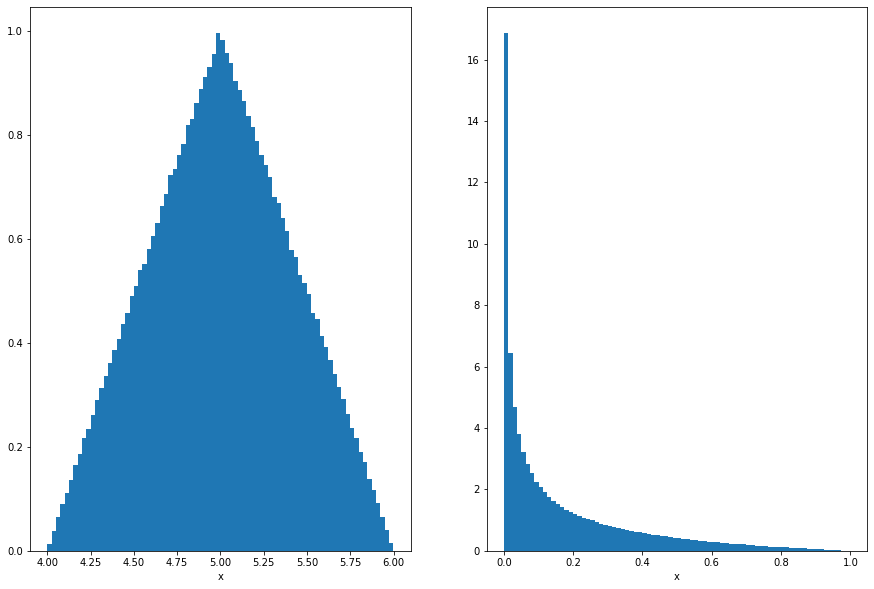

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N     = 10**6
bins  = 80
data = np.random.triangular(4, 5, 6, N)
yData=(data - 5)**2

print(f"Mean(Y): {np.mean(yData)}, Var(X)={np.var(data)}")

fig, axs = plt.subplots(1, 2, figsize=(15,10))
h1 = axs[0].hist(data, bins=80, density=True)
axs[0].set_xlabel("x")
h2 = axs[1].hist(yData, bins=80, density=True)
axs[1].set_xlabel("x")

plt.show()

# Moments of distribution

We call $E[X^\mathcal{l}]$, the $\mathcal{l}$’th moment of $X$. In the continuous case

$$
E[X^{\mathcal{l}}]=\int_{-\infty}^{\infty}x^{\mathcal{l}}f(x)dx.
$$

The **Variance** es defined in terms of $E[X^2]$

$$
Var[X]=E[X^2]-(E[X])^2.
$$

If $\mathbf{X}\in\mathbb{R}^N$, then
$$
E[\mathbf{X}]=[E[X_1],E[X_2],\dots, E[X_N]]^T.
$$      


## Covariance matrix
For variance we need to consider all possible relationships, that is
$$
cov(X_m,X_n)=E[(X_m-E[X_m])(X_n-E[X_n])]=E[X_mX_n]-E[X_m]E[X_n].
$$
If $n = m$ is the classic definition of variance,  
We define the **covariance** matrix as:
$$
cov(\mathbf{X},\mathbf{X})=E[(\mathbf{X}-E[\mathbf{X}])(\mathbf{X}-E[\mathbf{X}])^T]=E[\mathbf{X}\mathbf{X}^T]-E[\mathbf{X}]E[\mathbf{X}]^T,
$$
commonly called **covariance matrix** (also known as auto-covariance matrix, dispersion matrix, variance matrix, or variance–covariance matrix).

# Variance properties



1. Given a constan vector $\mathbf{a}\in\mathbb{R}^N$ and a v.a. $\mathbf{X}\in\mathbb{R}^N$
$$
Var[\mathbf{a} + \mathbf{X}]=Var[\mathbf{X}]
$$
   
2. Given a constant matrix $A\in\mathbb{R}^{M\times N}$ and $\mathbf{X}\in\mathbb{R}^{N}$ a r.v. then:
$$
Var[A\mathbf{X}]=A^TVar[\mathbf{X}]A
$$

3. If $\mathbf{X}$ and $\mathbf{Y}$ are two independent v.a.
$$
Var[\mathbf{X}+\mathbf{Y}]=Var[\mathbf{X}]+Var[\mathbf{Y}]
$$


# The sample mean
Suppose now that the basic variable $X$ is real valued, and let $\mu = E(X)$ denote the expected value of $X$ and $\sigma^2 = var(X)$ the variance of  $X$.
  
The sample mean is
$$
M_N = \frac{1}{N} \sum_{n=1}^N X_n
$$
It is possible to proof that:

1. $E[M_N] = \mu$
2. $Var[M_N] =  \frac{\sigma^2}{n}$


# The Weak and Strong Laws of Large Numbers

1. $P\left(\left|M_N - \mu\right| \gt \epsilon\right) \to 0$ as $n \to \infty$ for $\epsilon \gt 0$. This follows from **Chebyshev's inequality**:
$$
P\left(\left|X - E[X]\right| \ge \epsilon\right) \le \frac{Cov[X]}{\epsilon^2}, \quad \epsilon \gt 0
$$
2. $M_N \to \mu$ as $N\to\infty$ with probability 1.


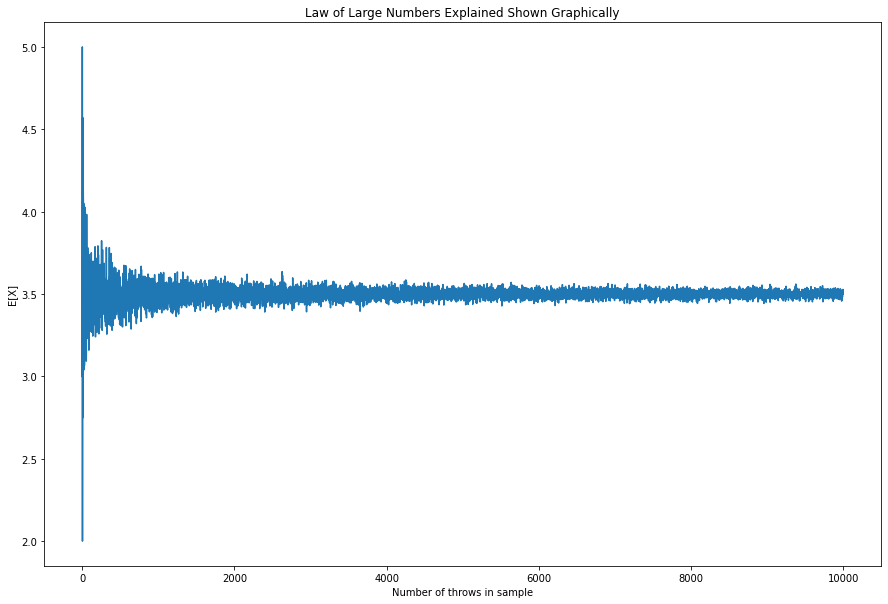

In [ ]:
import numpy as n
import matplotlib.pyplot as plt

results = []
NT = 10000
for num_throws in range(1,NT):
    throws = np.random.randint(low=1,high=7, size=num_throws)
    mean_throws = np.mean(throws)
    results.append(mean_throws)


fig, axs = plt.subplots(1, 1, figsize=(15,10))
axs.set_title('Law of Large Numbers Explained Shown Graphically')
axs.set_xlabel("Number of throws in sample")
axs.set_ylabel("E[X]")
axs.plot(results)

#The Central Limit Theorem (CLT)
While the CLT has several versions and many generalizations, they all have one thing in common: summations of a large number of random quantities, each with finite variance, yields a sum that is approximately normally distributed.


Text(0.5, 1.0, 'Binomial')

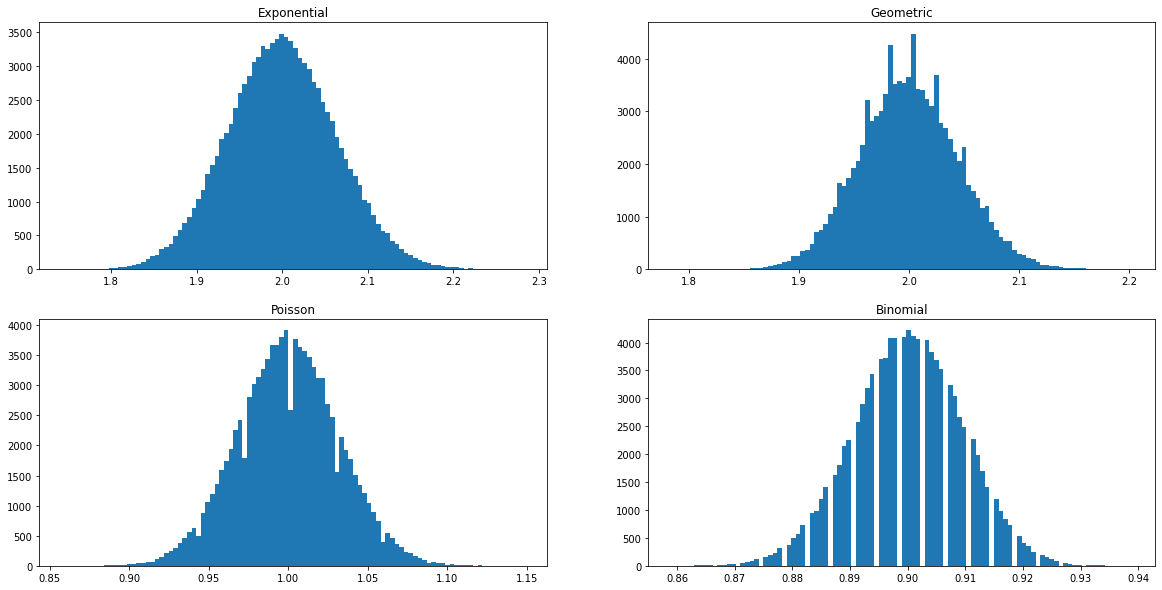

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


n = 1000
N = 10**5
data1 = [np.mean(np.random.exponential(scale=2.0,size=n)) for i in range(1,N)];
data2 = [np.mean(np.random.geometric(p=.5, size=n)) for i in range(1,N)];
data3 = [np.mean(np.random.poisson (lam=1.0, size=n)) for i in range(1,N)];
data4 = [np.mean(np.random.binomial(1, 0.9, size=n)) for i in range(1,N)];

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
axes[0,0].hist(data1, bins=100); axes[0,0].set_title('Exponential')
axes[0,1].hist(data2, bins=100); axes[0,1].set_title('Geometric')
axes[1,0].hist(data3, bins=100); axes[1,0].set_title('Poisson')
axes[1,1].hist(data4, bins=100); axes[1,1].set_title('Binomial')


